__体素修复代码（目前在多个模型上测试能够实现初步修复效果）__  
存在问题：修复过后的模型表面光滑度较差  
考虑解决方法：增加断裂结构判别式，根据具体情况进行增补

数据初始维度： (20, 60, 16)
数据调整后维度： (60, 16, 20)
数据标准化后维度： (120, 120, 120)
i,j,k: 30 52 51
i,j,k: 30 67 51
i,j,k: 68 54 60
i,j,k: 68 65 60
i,j,k: 70 56 66
i,j,k: 70 57 67
i,j,k: 70 62 67
i,j,k: 70 63 66
i,j,k: 71 56 65
i,j,k: 71 57 66
i,j,k: 71 62 66
i,j,k: 71 63 65
i,j,k: 86 58 63
i,j,k: 86 61 63
遍历了： 1643032 次
共有 1938 个非零元素
共有 14 个缺陷点
search_list: [[[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[29. 52. 51.]
  [31. 52. 51.]
  [30. 51. 51.]
  [30. 53. 51.]
  [30. 52. 50.]
  [30. 52. 52.]]

 [[29. 67. 51.]
  [31. 67. 51.]
  [30. 66. 51.]
  [30. 68. 51.]
  [30. 67. 50.]
  [30. 67. 52.]]

 [[67. 54. 60.]
  [69. 54. 60.]
  [68. 53. 60.]
  [68. 55. 60.]
  [68. 54. 59.]
  [68. 54. 61.]]

 [[67. 65. 60.]
  [69. 65. 60.]
  [68. 64. 60.]
  [68. 66. 60.]
  [68. 65. 59.]
  [68. 65. 61.]]

 [[69. 56. 66.]
  [71. 56. 66.]
  [70. 55. 66.]
  [70. 57. 66.]
  [70. 56. 65.]
  [70. 56. 67.]]

 [[69. 57. 67.]
  [71. 57. 67.]
  [70. 56. 67.]
  [70. 58. 67.]
  

{(30, 52, 50): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x25f22012e80>,
 (30, 52, 51): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x25f2201f460>,
 (30, 53, 50): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x25f2201f9d0>,
 (30, 54, 50): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x25f2201fd90>,
 (30, 54, 69): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x25f23558190>,
 (30, 55, 50): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x25f23558520>,
 (30, 55, 69): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x25f235588e0>,
 (30, 56, 50): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x25f23558ca0>,
 (30, 56, 69): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x25f23558fd0>,
 (30, 57, 50): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x25f23566460>,
 (30, 57, 69): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x25f23566820>,
 (30, 58, 50): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x25f23566be0>,
 (30, 58, 51): <mpl_toolkits.mplot3d.art3d.Poly3DCol

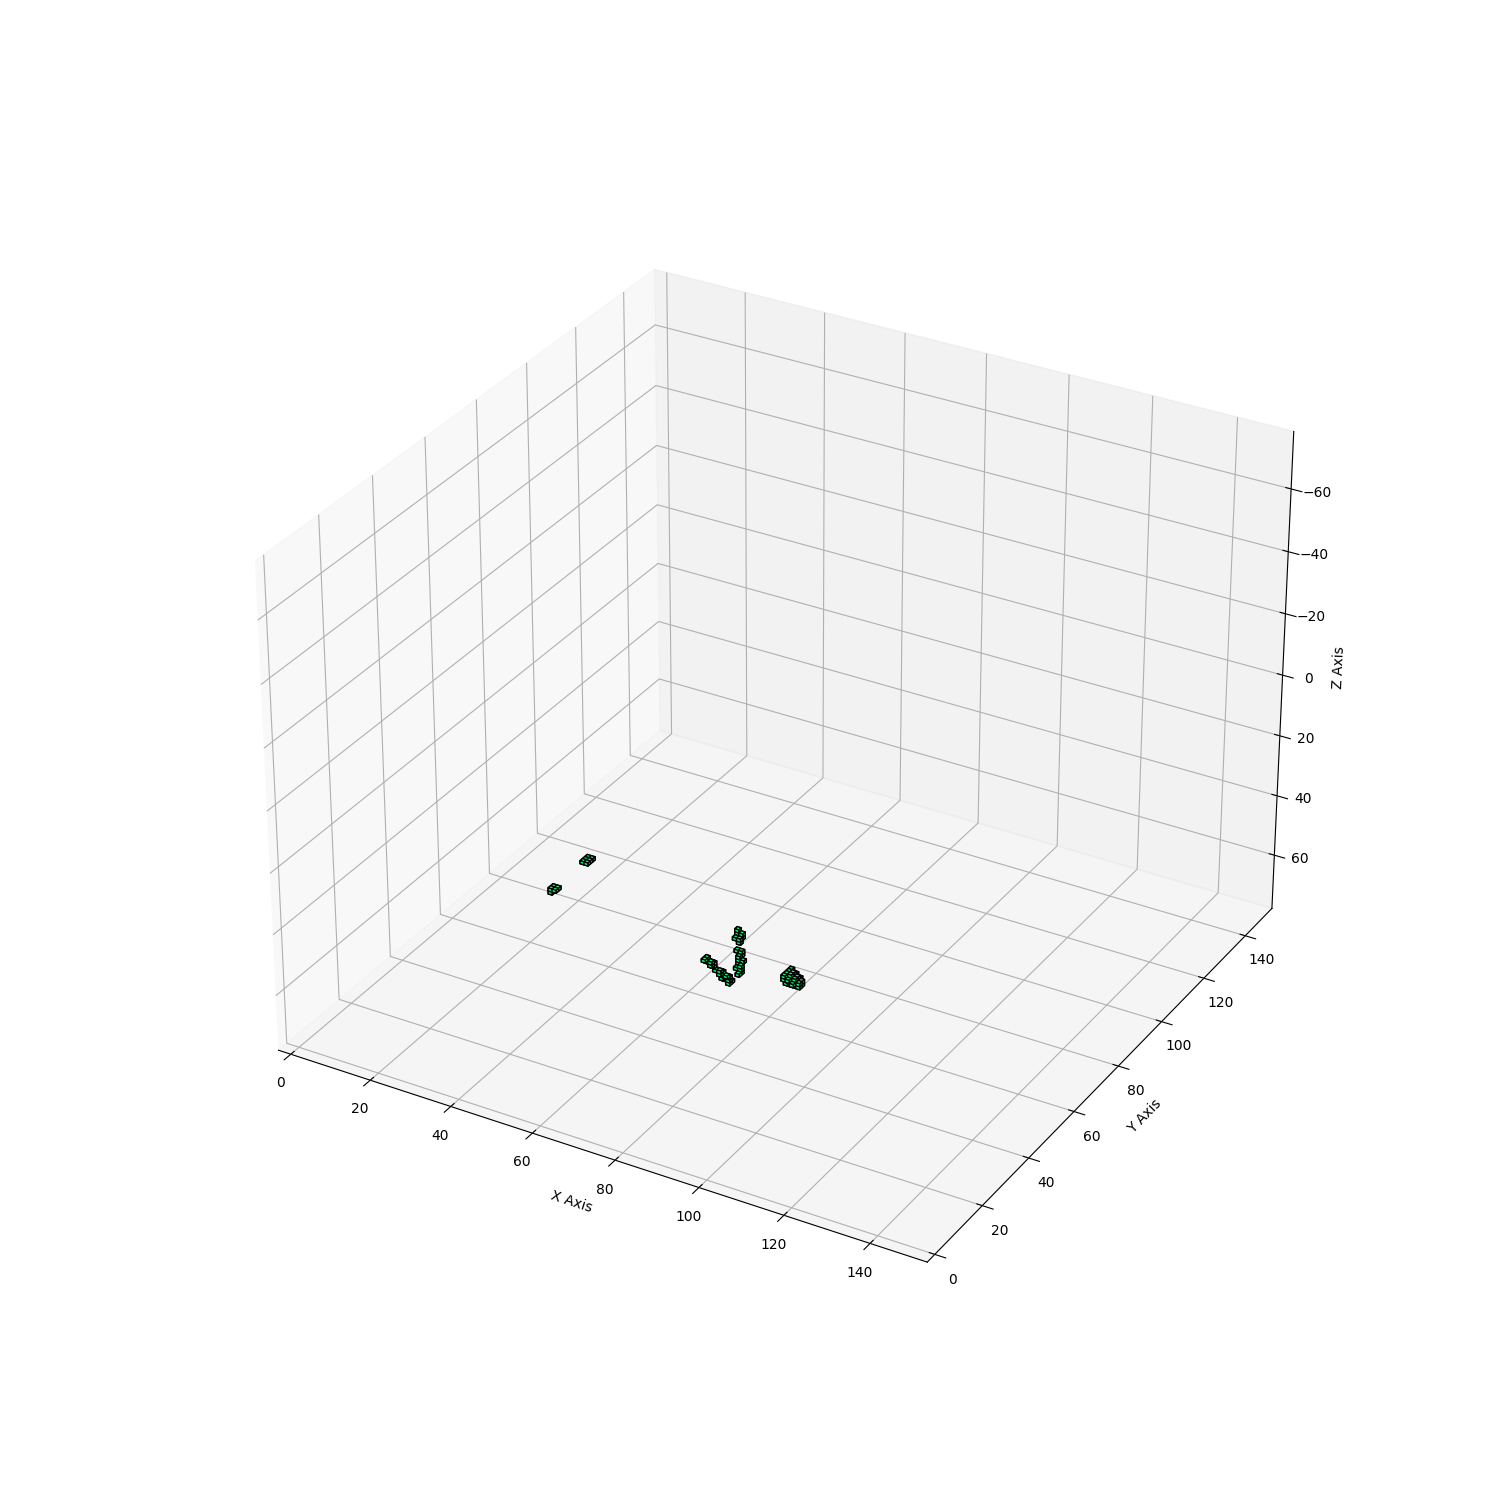

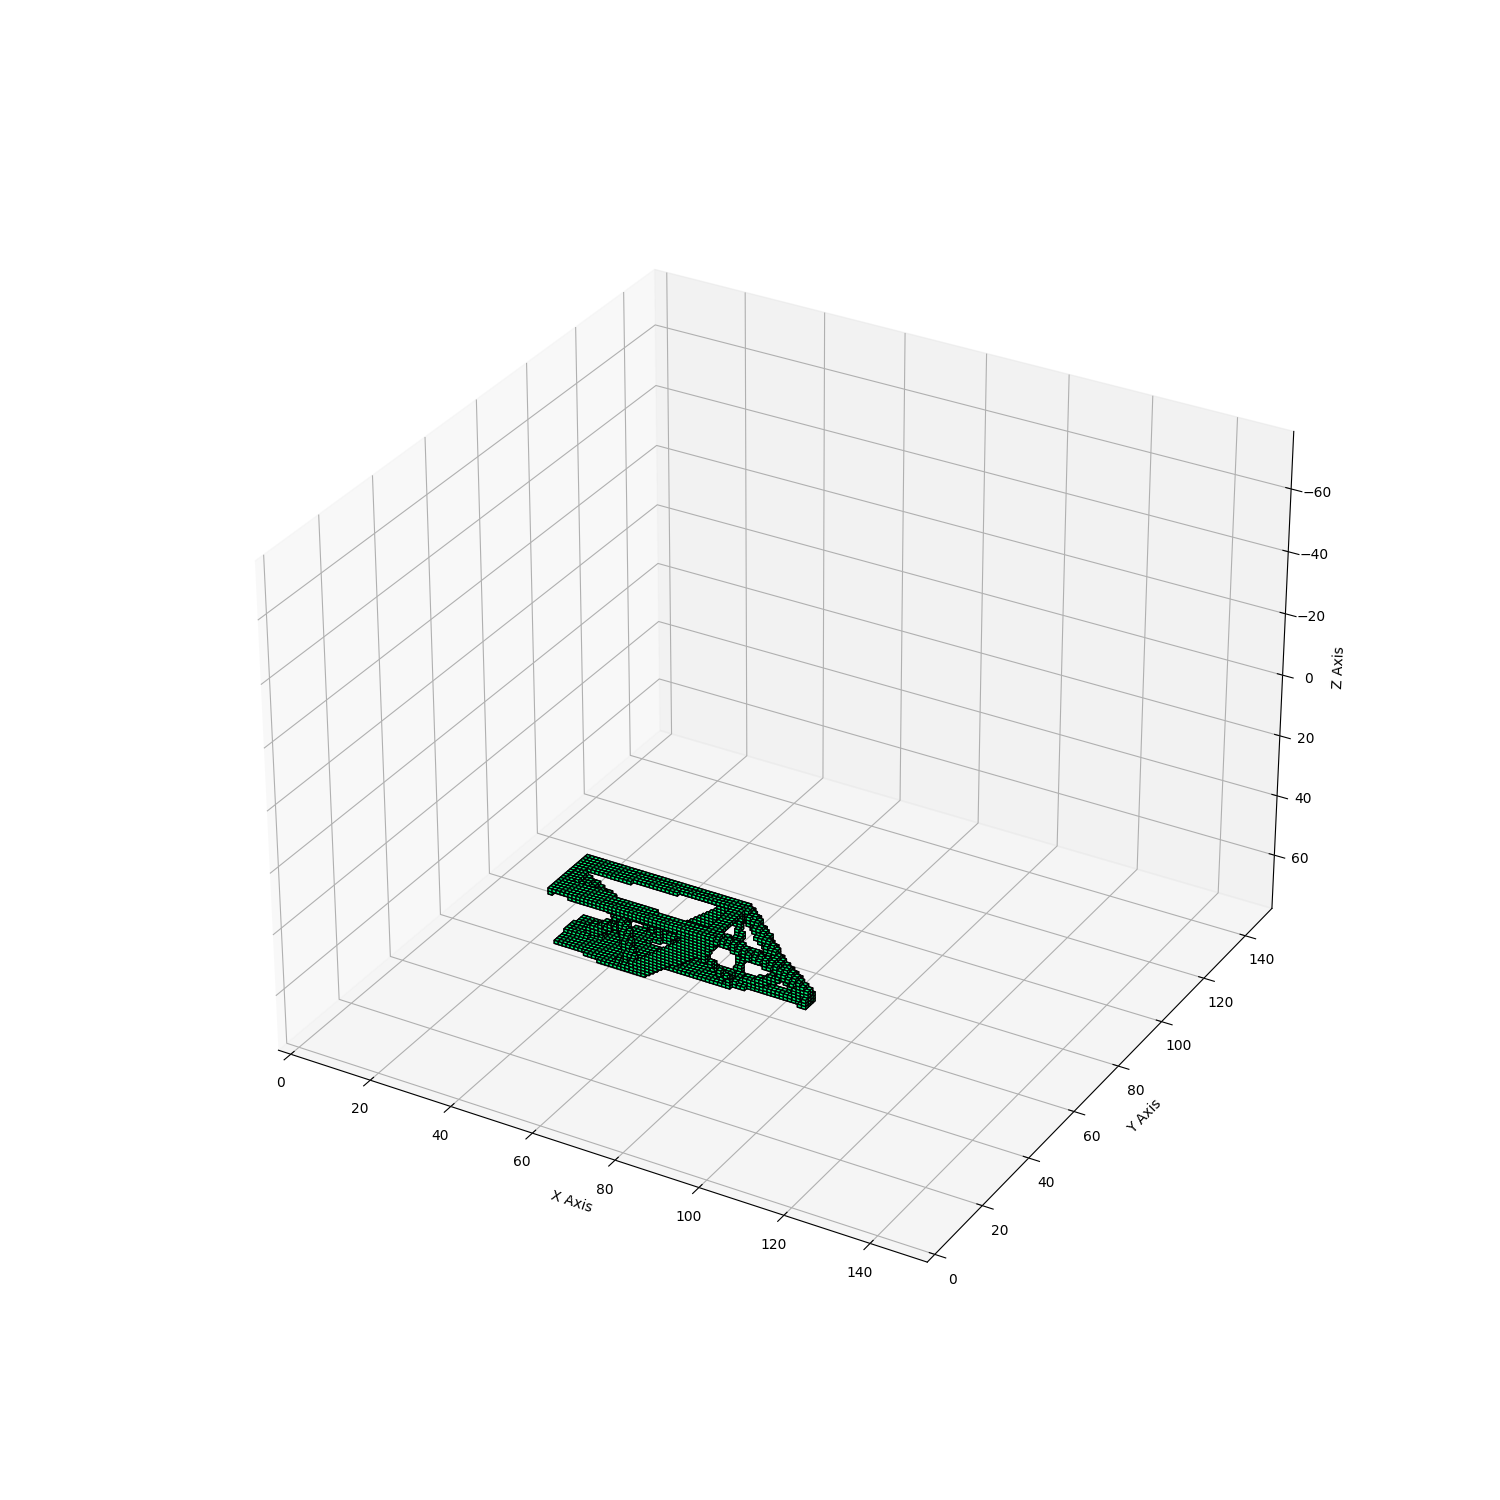

In [1]:
%matplotlib widget
import scipy.io as io
import numpy as np
import matplotlib.pyplot as plt



#数据读取与质量预处理
data = io.loadmat('../../Matlab_files/top3d_Model_1/topModel_1.mat')
data = data['ans']
data = np.array(data)
print('数据初始维度：',data.shape)
data = data.transpose(1, 2, 0)
print('数据调整后维度：',data.shape)#(x,z,y)
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        for k in range(data.shape[2]):
            if data[i][j][k] > 0.5:
                data[i][j][k] = 1
            else:
                data[i][j][k] = 0



#数据尺寸扩展为标准尺寸
nelx, nely, nelz = 120, 120, 120
if (nelx - data.shape[0])%2 !=0:
    data = np.pad(data, ((1, 0), (0, 0), (0 ,0)))
if (nelz - data.shape[1])%2 !=0:
    data = np.pad(data, ((0, 0), (1, 0), (0 ,0)))
if (nely - data.shape[2])%2 !=0:
    data = np.pad(data, ((0, 0), (0, 0), (1 ,0)))
data_new = np.pad(data, (((nelx - data.shape[0])//2, (nelx - data.shape[0])//2),
                    ((nely - data.shape[1])//2, (nely - data.shape[1])//2),
                    ((nelz - data.shape[2])//2, (nelx - data.shape[2])//2)))
print('数据标准化后维度：',data_new.shape)



#尺寸标准化后模型可视化
# io.savemat('../../Matlab_files/testModel/standizationtopModel_temp/topModel_6stand.mat',{'standdata':data_new})
# mycolormap = plt.get_cmap('winter')
# data_new_max = data_new.max()
# relativevalue = np.round(data_new / data_new_max, 1)
# colorsvalues = mycolormap(relativevalue)
# fig = plt.figure(figsize=(15, 15))
# ax = fig.add_subplot(projection='3d')
# ax.set_xlabel('X Axis')
# ax.set_ylabel('Y Axis')
# ax.set_zlabel('Z Axis')
# ax.set_xlim(0, 150)
# ax.set_ylim(0, 150)
# ax.set_zlim(75, -75)
# ax.voxels(data_new, facecolors=colorsvalues,edgecolors = 'k', shade = False)


#查找模型存在的单共享边等断裂结构
label_data = np.zeros((120, 120, 120))
face_voxel = []
search_list = np.zeros((1, 6, 3))
n = 0
t = 0
l = 0
for i in range(1,(data_new.shape[0]-1)):
    for j in range(1,(data_new.shape[1]-1)):
        for k in range(1,(data_new.shape[2]-1)):
            if data_new[i][j][k] !=0:
                face_voxel.append(data_new[i-1][j][k])
                # print('1:',face_voxel)
                face_voxel.append(data_new[i+1][j][k])
                # print('2:',face_voxel)
                face_voxel.append(data_new[i][j-1][k])
                # print('3:',face_voxel)
                face_voxel.append(data_new[i][j+1][k])
                # print('4:',face_voxel)
                face_voxel.append(data_new[i][j][k-1])
                # print('5:',face_voxel)
                face_voxel.append(data_new[i][j][k+1])
                # print('6:',face_voxel)
                sum_value = sum(face_voxel)
                # print('face_voxel:',face_voxel)
                
                if sum_value == 0 or sum_value == 1:
                    x, z, y = i, j ,k
                    print('i,j,k:',i, j, k)
                    label_data[i-2:i+2,j-2:j+2,k-2:k+2] = data_new[i-2:i+2,j-2:j+2,k-2:k+2]
                    face_voxel_index = np.array([[[x-1, z, y],
                                                 [x+1, z, y],
                                                 [x, z-1, y],
                                                 [x, z+1, y],
                                                 [x, z, y-1],
                                                 [x, z, y+1]]])
                    search_list = np.append(search_list, face_voxel_index, axis=0)
                    l += 1
                    
                face_voxel = []
                t += 1    
            n += 1
print('遍历了：',n,'次')
print('共有',t,'个非零元素')
print('共有',l,'个缺陷点')
print('search_list:',search_list)
print('search_list.shape:',search_list.shape)


# # #针对模型缺陷部分进行插补
# for o in range(1,len(search_list)):
#     repair_index = search_list[o]
#     for w in range(6):
#         point_index = repair_index[w]
#         index_x = int(point_index[0])
#         index_z = int(point_index[1])
#         index_y = int(point_index[2])
#         data_new[index_x, index_z, index_y] = 1


io.savemat('C:/Users/11573/Desktop/data/test1_2.mat',{'labeldata':label_data})
# # io.savemat('C:/Users/11573/Desktop/VSCode_repos/Matlab_files/top3d_Model_6/topModel_6_repair.mat',{'repairdata':data_new})


# # #抓取的缺陷结构三维可视化
mycolormap = plt.get_cmap('winter')
label_data_max = label_data.max()
relativevalue = np.round(label_data / label_data_max, 1)
colorsvalues = mycolormap(relativevalue)
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_xlim(0, 150)
ax.set_ylim(0, 150)
ax.set_zlim(75, -75)
ax.voxels(label_data, facecolors=colorsvalues,edgecolors = 'k', shade = False)

# # #修补后整体结构三维可视化
mycolormap = plt.get_cmap('winter')
data_new_max = data_new.max()
relativevalue = np.round(data_new / data_new_max, 1)
colorsvalues = mycolormap(relativevalue)
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_xlim(0, 150)
ax.set_ylim(0, 150)
ax.set_zlim(75, -75)
ax.voxels(data_new, facecolors=colorsvalues,edgecolors = 'k', shade = False)
